# Writing a Data Scientist Blog Post

### Pick a dataset, as mentioned on the previous page.

The datasets I will pick up are the stack overflow surveys ranged for 5 years from 2018 to 2022. By doing this, I could analyze the historical data overtime and hopefully be able to predict the trend for the upcoming years.

### Pose at least three questions related to business or real-world applications of how the data could be used.

1. Over a 5 years span, what are the most popular web frameworks used by the developers, which framework is the most desired one for the developers to learn.

2. Similarly, I want to know over a 5 years span, what are the most popular programming languages used by the developers, which programming language is the most desired one for the developers to study.

3. Was there any changes of preference when it comes to IDE and operating system.

### Create a Jupyter Notebook, using any associated packages you'd like, to:

#### Prepare data:
* Gather necessary data to answer your questions
* Handle categorical and missing data
* Provide insight into the methods you chose and why you chose them

#### Analyze, Model, and Visualize

Provide a clear connection between your business questions and how the data answers them

In [113]:
# import dependencies

import os
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [48]:
base_dir = os.path.abspath(os.getcwd())

In [49]:
base_dir

'/home/tony/projects/uda_data_science_blog'

In [128]:
# Path to the zip file
zip_list = ['survey_results_public_2018.zip', 'survey_results_public_2019.zip', 'survey_results_public_2020.zip', 'survey_results_public_2021.zip', 'survey_results_public_2022.zip']
zip_out_path = os.path.join(base_dir, 'data')

for file in zip_list:
    zip_path = os.path.join(base_dir, f'data/{file}')
    
    # Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(zip_out_path)

In [4]:
df_2018 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2018.csv'))
df_2019 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2019.csv'))
df_2020 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2020.csv'))
df_2021 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2021.csv'))
df_2022 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2022.csv'))

/tmp/ipykernel_31500/1687846786.py:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv(os.path.join(base_dir, 'data/survey_results_public_2018.csv'))


In [5]:
# to understand how many rows, cols are there for each table
for t in [df_2018, df_2019, df_2020, df_2021, df_2022]:
    print(t.shape)

(98855, 129)
(88883, 85)
(64461, 61)
(83439, 48)
(73268, 79)


In [6]:
# add year col to each df
df_2018['year'] = 2018
df_2019['year'] = 2019
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022

In [7]:
# translation mapping to change col names for cross year consistency
col_mappings = {
    'YearsCoding': 'YearsCode',
    'YearsCodingProf': 'YearsCodePro',
    'LanguageWorkedWith': 'LanguageHaveWorkedWith',
    'LanguageDesireNextYear': 'LanguageWantToWorkWith',
    'DatabaseWorkedWith': 'DatabaseHaveWorkedWith',
    'DatabaseDesireNextYear': 'DatabaseWantToWorkWith',
    'PlatformWorkedWith': 'PlatformHaveWorkedWith',
    'PlatformDesireNextYear': 'PlatformWantToWorkWith',
    'FrameworkWorkedWith': 'WebframeHaveWorkedWith',
    'WebframeWorkedWith': 'WebframeHaveWorkedWith',
    'WebFrameWorkedWith': 'WebframeHaveWorkedWith',
    'FrameworkDesireNextYear': 'WebframeWantToWorkWith',
    'WebFrameDesireNextYear': 'WebframeWantToWorkWith',
    'WebframeDesireNextYear': 'WebframeWantToWorkWith',
    'IDE': 'NEWCollabToolsHaveWorkedWith',
    'DevEnviron': 'NEWCollabToolsHaveWorkedWith',
    'OpSys': 'OperatingSystem',
}


In [8]:
# rename col names based on mapping
for t in [df_2018, df_2019, df_2020, df_2021, df_2022]:
    t.rename(columns=col_mappings, inplace=True)

In [9]:
## concatenate tables with the same col names
df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022], axis=0)
df.reset_index(drop=True, inplace=True)

In [10]:
# only to keep necessary cols to answer my questions
select_cols = ['year', 'YearsCode', 'YearsCodePro', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'OperatingSystem', 'OpSysProfessional use', 'OpSysPersonal use', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith']
df = df[select_cols]


In [11]:
df.head()

,year,YearsCode,YearsCodePro,DevType,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,OperatingSystem,OpSysProfessional use,OpSysPersonal use,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith
0,2018,3-5 years,3-5 years,Full-stack developer,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,NaN,NaN,Linux-based,NaN,NaN,Komodo;Vim;Visual Studio Code,NaN
1,2018,30 or more years,18-20 years,Database administrator;DevOps specialist;Full-...,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,NaN,NaN,Linux-based,NaN,NaN,IPython / Jupyter;Sublime Text;Vim,NaN
2,2018,24-26 years,6-8 years,Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,18-20 years,12-14 years,Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,Azure,NaN,Angular;.NET Core;React,NaN,NaN,Windows,NaN,NaN,Visual Studio;Visual Studio Code,NaN
4,2018,6-8 years,0-2 years,Data or business analyst;Desktop or enterprise...,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,NaN,NaN,NaN,NaN,Windows,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,NaN


In [12]:
df.groupby('year')['WebframeHaveWorkedWith'].apply(lambda x: x.isna().sum())

year
2018    47235
2019    23861
2020    22182
2021    21732
2022    19724
Name: WebframeHaveWorkedWith, dtype: int64

In [122]:
# there are missing values in WebframeHaveWorkedWith column after grouping, i want to remove these missing rows
web = df[['WebframeHaveWorkedWith', 'year']]
web = web.dropna(subset=['WebframeHaveWorkedWith'])

In [123]:
# split the values in the column by semicolons, resulting in a column of lists. Then, use df.explode('WebframeHaveWorkedWith') 
# to explode the lists into separate rows, duplicating the other columns as necessary.
web['WebframeHaveWorkedWith'] = web['WebframeHaveWorkedWith'].str.split(';')
web = web.explode('WebframeHaveWorkedWith')

In [127]:
web

,WebframeHaveWorkedWith,year
0,Django,2018
0,React,2018
1,Django,2018
5,Angular,2018
5,Node.js,2018
...,...,...
408905,ASP.NET Core,2022
408905,Blazor,2022
408905,Node.js,2022
408905,React.js,2022


In [126]:
web['WebframeHaveWorkedWith'].unique()

array(['Django', 'React', 'Angular', 'Node.js', 'Hadoop', 'Spark',
       'Spring', '.NET Core', 'Cordova', 'Xamarin', 'TensorFlow',
       'Torch/PyTorch', 'Flask', 'Express', 'jQuery', 'React.js',
       'Ruby on Rails', 'Other(s):', 'Angular/Angular.js', 'ASP.NET',
       'Vue.js', 'Laravel', 'Drupal', 'ASP.NET Core', 'Angular.js',
       'Gatsby', 'Symfony', 'FastAPI', 'ASP.NET Core ', 'Svelte',
       'Next.js', 'Phoenix', 'Nuxt.js', 'Blazor', 'Fastify', 'Deno',
       'Play Framework'], dtype=object)

In [129]:
# here i want to clean up the data a bit to make it align across the years
web.loc[web['WebframeHaveWorkedWith']=='React', 'WebframeHaveWorkedWith'] = React.js

NameError: name 'React' is not defined

In [32]:
web_counts = web['WebframeHaveWorkedWith'].value_counts()

In [33]:
web_counts.head(10)

WebframeHaveWorkedWith
jQuery      86592
React.js    83617
Angular     55249
Node.js     51331
Express     49050
ASP.NET     44014
Vue.js      39225
Django      38434
Spring      35495
Flask       31867
Name: count, dtype: int64

It is shown that overall the most popular web framework is jQuery, alongside with React.js, Angular, nodejs and express. 

Next I will pick up the 10 most popular web frameworks and analyze their yearly usage trend.

In [104]:
web_counts = web.groupby(['year', 'WebframeHaveWorkedWith']).value_counts()

In [105]:
# Reshape the result for plotting
web_counts = web_counts.unstack(fill_value=0)

In [107]:
web_counts = web_counts[['jQuery', 'React.js', 'Angular', 'Node.js', 'Express', 'ASP.NET', 'Vue.js', 'Django', 'Spring', 'Flask']]

In [116]:
web_counts

WebframeHaveWorkedWith,jQuery,React.js,Angular,Node.js,Express,ASP.NET,Vue.js,Django,Spring,Flask
year,,,,,,,,,,
2018,0,0,19023,25598,0,0,0,6723,9079,0
2019,30981,19877,0,0,12522,16699,9671,8249,10298,7694
2020,18316,15167,10617,0,8961,9258,7322,6014,6941,6005
2021,21693,25296,14471,0,15010,9918,11954,9446,9177,10174
2022,15602,23277,11138,25733,12557,8139,10278,8002,0,7994


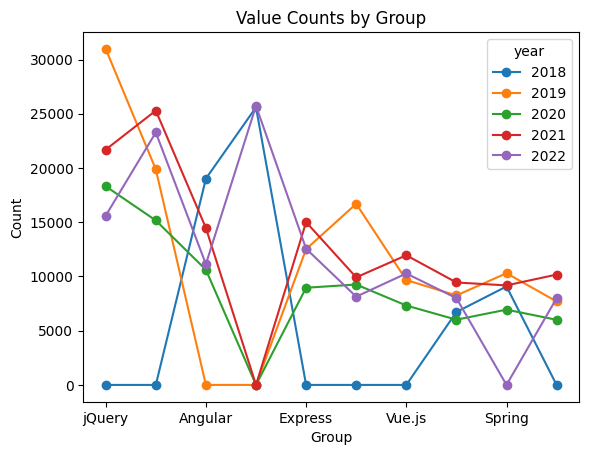

In [118]:
# Plot the grouped value counts using a line chart
web_counts.T.plot(marker='o')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Value Counts by Group')

# Show the plot
plt.show()



